# โหลดข้อมูลจาก google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


## ตรวจสอบข้อมูลจาก google drive
หากต้องการใช้คำสั่ง linux ผ่าน ipynb ให้ใช้เครื่องหมาย **!** นำหน้าคำสั่ง linux


```
from google.colab import drive
drive.mount('/content/drive/')
```

*  จากคำสั่งข้างต้น google colab จะ Mount ไดเรกทอรี ไว้ที่ **'/content/drive/'**
*  จากนั้นสามารถกำหนด drive ที่อยู่ใน google drive เพื่อเข้าถึงข้อมูลที่ต้องการใช้งาน


In [3]:
! ls "/content/drive/My Drive/Colab Notebooks"

'Copy of folio-data (1).ipynb'	 facenet_model.json   NeuralNetwork-Keras.ipynb
'Copy of folio-data.ipynb'	 folio-data.ipynb     RTR2LP34edit.jpg
 deep-learning			 keras-CIFAR.ipynb    test.jpg
 deep_learning_turkey.ipynb	 keras-vgg.ipynb      Untitled0.ipynb
 facenet.ipynb			 MNSIT-CNN.ipynb


In [5]:
# ตัวอย่างได้เก็บข้อมูลไว้ที่ไดเรกทอรี deep-learning

! ls "/content/drive/My Drive/Colab Notebooks/deep-learning"

elephant-01.jpg  elephant-02.jpg  elephants-03.png  resnet50_demo.ipynb


# ResNet50

## โหลดโมเดลของ ResNet50 โดยใช้ Keras

In [6]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
102858752/102853048 [==============================] - 1s 0us/step



```
model = ResNet50(weights='imagenet')
```
*  จากโค้ดข้างต้น **weights='imagenet'** หมายถึงการใช้ Transfer Learning 
*  Transfer Learning หมายถึงการใช้ **weights** ที่ผ่านการเรียนรู้มาแล้ว 
*  ในกรณีนี้ผู้วิจัยได้เรียนรู้จากข้อมูลชุด **imagenet**  (http://www.image-net.org/) ซึ่งเป็นชุดข้อมูลที่ใช้สำหรับการแข่งขัน ILSVRC (IMAGENET Large Scale Visual Recognition Challenge) โดยมีข้อมูลมากกว่า 1 ล้านรูปภาพ และมีจำนวนกลุ่ม (class) ถึง 1000 กลุ่ม


* สามารถตรวจสอบกลุ่มทั้ง 1000 กลุ่มของ imagenet ได้จากลิงก์ https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a


สามารถตรวจสอบโครงสร้างของ ResNet50 ได้จากคำสั่ง 

```
model.summary()
```

In [7]:
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

*  จาก **model.summary()** สังเกตได้ว่าชั้นสุดท้ายคือ **fc1000 (Dense)**

```
fc1000 (Dense)                  (None, 1000)         2049000     avg_pool[0][0] 
```

ซึ่งหมายถึง Fully Connected ชั้นสุดท้าย (ชั้นคำตอบ) ซึ่งมีทั้งหมด 1000 โหนด

##  แสดงรูปภาพด้วยคำสั่งของ matplotlib 

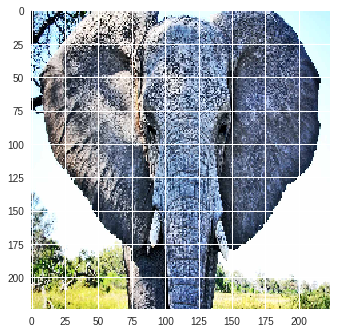

In [10]:
import matplotlib.pyplot as plt

img_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/elephant-01.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

จากคำสั่งข้างต้น

```
img = image.load_img(img_path, target_size=(224, 224))
```

รูปที่อ่านเข้ามาจะถูกปรับให้มีขนาด 224x224 pixel โดยถูกจัดเก็บให้อยู่ในรูปแบบของ **PIL image**

In [18]:
# ประเภทของข้อมูล
print(type(img))

# ขนาดของรูปภาพ
width, height = img.size
print('width', width, 'height', height)

<class 'PIL.Image.Image'>
width 224 height 224


## การพยากรณ์ (Predict)

In [22]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504458', 'African_elephant', 0.2825603), ('n01871265', 'tusker', 0.1843144), ('n02504013', 'Indian_elephant', 0.068567924)]


* จากตัวอย่างโค้ดข้างต้น

```
preds = model.predict(x)
```

หมายถึง การส่งตัวแปร x ไปพยากรณ์ (predict) โดยที่ x คือรูปภาพ (image) ที่รับเข้ามา


* คำสั่ง **decode_predictions(preds, top=3)[0]**

```
print('Predicted:', decode_predictions(preds, top=3)[0])
```
หมายถึง การแปลงค่าความน่าจะเป็นจากทั้งหมด 1000 class ให้เป็นคำตอบโดยเลือกเฉพาะ 3 ลำดับแรก (top=3) มาแสดงเท่านั้น


In [23]:
# ตัวอย่างแสดงผลลัพธ์ 5 ลำดับแรก
print('Predicted:', decode_predictions(preds, top=5)[0])

Predicted: [('n02504458', 'African_elephant', 0.2825603), ('n01871265', 'tusker', 0.1843144), ('n02504013', 'Indian_elephant', 0.068567924), ('n01688243', 'frilled_lizard', 0.04708036), ('n03743016', 'megalith', 0.04102087)]


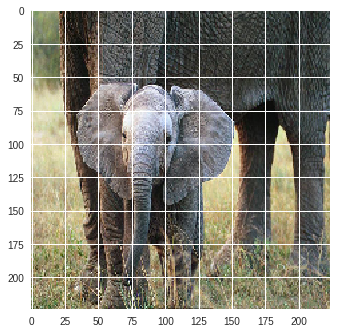

Predicted: [('n02504458', 'African_elephant', 0.85093904), ('n01871265', 'tusker', 0.11700195), ('n02504013', 'Indian_elephant', 0.017119225)]


In [27]:
import matplotlib.pyplot as plt

img_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/elephant-02.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

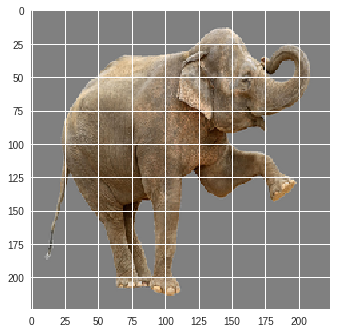

Predicted: [('n02504013', 'Indian_elephant', 0.8920196), ('n01871265', 'tusker', 0.09250691), ('n02504458', 'African_elephant', 0.015418465)]


In [29]:
import matplotlib.pyplot as plt

img_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/elephants-03.png'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

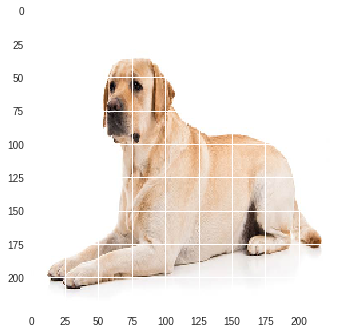

Predicted: [('n02099712', 'Labrador_retriever', 0.43259504), ('n02109047', 'Great_Dane', 0.23525527), ('n02088466', 'bloodhound', 0.1472079)]


In [35]:
import matplotlib.pyplot as plt

img_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/dog-labrador-01.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])